### Figures of spatial variation in continental vs. glacial river contributions 

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
import os
from itertools import compress
import datetime as dt
from datetime import date
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm
from math import sin, cos, sqrt, atan2, radians
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import sys
sys.path.insert(0, '/ocean/brogalla/GEOTRACES/analysis-brogalla/modules')
import ariane as ar

##### Parameters:

In [3]:
# Domain dimensions:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# Results folders:
folder_ref = '/data/brogalla/run_storage/Mn-set4-202004/'
folder_riv = '/data/brogalla/run_storage/riv-2a-202005/'
folder_con = '/data/brogalla/run_storage/riv-2b-202005/'

# Time series folders:
folder_ts_ref   = '/ocean/brogalla/GEOTRACES/time-series/Mn-set4-202004/'
folder_ts_riv2a = '/ocean/brogalla/GEOTRACES/time-series/riv-2a-202005/'
folder_ts_riv2b = '/ocean/brogalla/GEOTRACES/time-series/riv-2b-202005/'

# Boundary coordinates:
l1i = 2013-imin;                      l1j = np.arange(300-jmin,392-jmin)
l2i = 1935-imin;                      l2j = np.arange(450-jmin,530-jmin)
l3i = np.arange(1850-imin,1885-imin); l3j = 555-jmin
l4i = np.arange(1753-imin,1837-imin); l4j = 568-jmin
l5i = np.arange(1720-imin,1790-imin); l5j = 605-jmin
l6i = 1730-imin;                      l6j = np.arange(660-jmin,690-jmin)
t1i = np.arange(1635-imin,1653-imin); t1j = 760-jmin
r1i = 1520-imin;                      r1j = np.arange(505-jmin,673-jmin)
r2i = 1520-imin;                      r2j = np.arange(385-jmin,405-jmin)
N1i = np.arange(1570-imin,1630-imin); N1j = 635-jmin #Nares
P1i = 1585-imin;                      P1j = np.arange(485-jmin,538-jmin)  #Parry channel
P1j = P1j[10:-5]; N1i = N1i[11:-8]

# Color map:
N = 256
vals_cont = np.ones((N, 4))
vals_cont[:, 0] = np.linspace(164/N, 1, N)
vals_cont[:, 1] = np.linspace(116/N, 1, N)
vals_cont[:, 2] = np.linspace(84/N, 1, N)
cont_cmap = ListedColormap(vals_cont).reversed()

vals_glac = np.ones((N, 4))
vals_glac[:, 0] = np.linspace(113/N, 1, N)
vals_glac[:, 1] = np.linspace(169/N, 1, N)
vals_glac[:, 2] = np.linspace(144/N, 1, N)
glac_cmap = ListedColormap(vals_glac).reversed()

vals_both = np.ones((N, 4))
vals_both[:, 0] = np.linspace(89/N, 1, N); 
vals_both[:, 1] = np.linspace(89/N, 1, N)
vals_both[:, 2] = np.linspace(89/N, 1, N)
both_cmap = ListedColormap(vals_both).reversed()

##### Load files:

In [4]:
# Meshmasks
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])
land_mask = np.ma.masked_where((tmask[0,:,:,:] > 0.1) , tmask[0,:,:,:]) 

tmask_full    = np.empty((12,50,isize,jsize))
tmask_full[:] = tmask[0,:,imin:imax,jmin:jmax]

mesh  = nc.Dataset('/data/brogalla/old/meshmasks/ANHA12_mesh1.nc')
lon   = np.array(mesh.variables['nav_lon'])
lat   = np.array(mesh.variables['nav_lat'])

In [5]:
ref   = nc.Dataset('/data/brogalla/run_storage/Mn-set4-202004/ref-2002/ANHA12_EXH006_2002_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [6]:
# Load Mn results
file14  = 'ANHA12_EXH006_2014_monthly.nc'
file15  = 'ANHA12_EXH006_2015_monthly.nc'
file16  = 'ANHA12_EXH006_2016_monthly.nc'
file17  = 'ANHA12_EXH006_2017_monthly.nc'
file18  = 'ANHA12_EXH006_2018_monthly.nc'
file19  = 'ANHA12_EXH006_2019_monthly.nc'

base_monthly14 = nc.Dataset(folder_ref+'ref-2014/'+file14); 
base_monthly15 = nc.Dataset(folder_ref+'ref-2015/'+file15); 
base_monthly16 = nc.Dataset(folder_ref+'ref-2016/'+file16);
base_monthly17 = nc.Dataset(folder_ref+'ref-2017/'+file17); 
base_monthly18 = nc.Dataset(folder_ref+'ref-2018/'+file18); 
base_monthly19 = nc.Dataset(folder_ref+'ref-2019/'+file19);
glac_monthly14 = nc.Dataset(folder_riv+'riv-2a-2014/'+file14); 
glac_monthly15 = nc.Dataset(folder_riv+'riv-2a-2015/'+file15); 
glac_monthly16 = nc.Dataset(folder_riv+'riv-2a-2016/'+file16);
glac_monthly17 = nc.Dataset(folder_riv+'riv-2a-2017/'+file17); 
glac_monthly18 = nc.Dataset(folder_riv+'riv-2a-2018/'+file18); 
glac_monthly19 = nc.Dataset(folder_riv+'riv-2a-2019/'+file19);
cont_monthly14 = nc.Dataset(folder_con+'riv-2b-2014/'+file14);
cont_monthly15 = nc.Dataset(folder_con+'riv-2b-2015/'+file15);
cont_monthly16 = nc.Dataset(folder_con+'riv-2b-2016/'+file16);
cont_monthly17 = nc.Dataset(folder_con+'riv-2b-2017/'+file17); 
cont_monthly18 = nc.Dataset(folder_con+'riv-2b-2018/'+file18); 
cont_monthly19 = nc.Dataset(folder_con+'riv-2b-2019/'+file19);

dmn_cont_2014 = np.array(cont_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2015 = np.array(cont_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2016 = np.array(cont_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2017 = np.array(cont_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2018 = np.array(cont_monthly18.variables['dissolmn'])[:,0,:,:,:]
dmn_cont_2019 = np.array(cont_monthly19.variables['dissolmn'])[:,0,:,:,:]

dmn_glac_2014 = np.array(glac_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2015 = np.array(glac_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2016 = np.array(glac_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2017 = np.array(glac_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2018 = np.array(glac_monthly18.variables['dissolmn'])[:,0,:,:,:]
dmn_glac_2019 = np.array(glac_monthly19.variables['dissolmn'])[:,0,:,:,:]

dmn_base_2014 = np.array(base_monthly14.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2015 = np.array(base_monthly15.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2016 = np.array(base_monthly16.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2017 = np.array(base_monthly17.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2018 = np.array(base_monthly18.variables['dissolmn'])[:,0,:,:,:]
dmn_base_2019 = np.array(base_monthly19.variables['dissolmn'])[:,0,:,:,:]

##### Functions:

Calculate the proportional contribution of glacial rivers to each grid cell:

$$ prop = \frac{Mn_{glacier}-Mn_{base}}{Mn_{base}} = \frac{Mn_{glacier}}{Mn_{base}} - 1 $$

In [7]:
def calculate_prop(dmn_riv_off, dmn_riv_on):
    # Input arguments:
    # - dmn_riv_on (t,z,y,x) --- concentration of dMn with riverine contribution on
    # - dmn_riv_off(t,z,y,x) --- concentration of dMn with rivers off
    
    diff_rivers = dmn_riv_on - dmn_riv_off
    
    # Contribution of rivers / total concentration (with rivers on):
    # should be an elementwise operation
    prop_river  = np.divide(diff_rivers, dmn_riv_off)
    
    # Output:
    # - prop_river(t,z,y,x)  --- proportional contribution of river to observed [dMn]
    return prop_river

In [8]:
def time_series_pickle(year, riv_2a=False, riv_2b=False):
    # Load calculated time series of fluxes:
    
    if riv_2a:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_riv2a+'time-series-'+str(year)+'.pickle','rb'))  
    elif riv_2b:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_riv2b+'time-series-'+str(year)+'.pickle','rb'))  
    else:
        time_series_V1, time_series_V2, time_series_V3, time_series_V4, time_series_V5, time_series_V6,time_series_V7,\
        time_series_V8, time_series_V9, time_series_V10, time_series_V11, time_series_mn1, time_series_mn2, \
        time_series_mn3, time_series_mn4, time_series_mn5, time_series_mn6, time_series_mn7, time_series_mn8, \
        time_series_mn9, time_series_mn10, time_series_mn11 = \
            pickle.load(open(folder_ts_ref+'time-series-'+str(year)+'.pickle','rb'))
    
    # Conservation of volume check:
    sum_V = -1*np.sum(time_series_V1,axis=2) - np.sum(time_series_V2,axis=2) - np.sum(time_series_V7,axis=2) - \
           (np.sum(time_series_V3,axis=2) + np.sum(time_series_V4,axis=2) + np.sum(time_series_V5,axis=2) + \
            np.sum(time_series_V6,axis=2)) + np.sum(time_series_V8,axis=2) + np.sum(time_series_V9,axis=2)
#     print('Total volume change at end of time period: ', np.sum(sum_V))
    
    # Combine western CAA time series:
    time_series_V_WCAA = np.sum(np.sum(time_series_V3,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V4,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V5,axis=2),axis=1) + \
                    np.sum(np.sum(time_series_V6,axis=2),axis=1)
    
    return time_series_V1, time_series_V2, time_series_V_WCAA, time_series_V7, time_series_V8, \
            time_series_V9, time_series_V10, time_series_V11

In [9]:
def file_dates(year):
    #start_date and end_date are datetime objects
    start_date = dt.datetime(year,1,1)
    end_date   = dt.datetime(year,12,31)
    
    file_list1E = np.sort(os.listdir('/data/brogalla/run_storage/Mn-set4-202004/ref-'+str(year)+'/'))
    file_list2 = np.sort(os.listdir('/data/brogalla/ANHA12/'))
    
    Vlist = [i[26:31]=='gridV' for i in file_list2]
    gridV_list = list(compress(file_list2, Vlist))
    dateV_list = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_list]
    gridV_file_list = list(compress(gridV_list, [V > start_date and V < end_date for V in dateV_list]))
    
    dates = [dt.datetime.strptime(i[14:25], "y%Ym%md%d") for i in gridV_file_list]
    
    return dates

In [10]:
def calc_distance(i,j):
    R = 6373.0 # approximate radius of earth in km

    lats_rad = [radians(l) for l in lats[i,j]]
    lons_rad = [radians(l) for l in lons[i,j]]

    dlon = [lon_step - lons_rad[0] for lon_step in lons_rad]
    dlat = [lat_step - lats_rad[0] for lat_step in lats_rad]

    distance = np.empty((len(dlon)))
    for i in range(0,len(dlon)):
        a = sin(dlat[i] / 2)**2 + cos(lats_rad[0]) * cos(lats_rad[i]) * sin(dlon[i] / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance[i] = R * c
        
    return distance

##### Calculations:

In [11]:
glacier_prop_2014   = calculate_prop(dmn_base_2014, dmn_glac_2014)
glacier_prop_2015   = calculate_prop(dmn_base_2015, dmn_glac_2015)
glacier_prop_2016   = calculate_prop(dmn_base_2016, dmn_glac_2016)
glacier_prop_2017   = calculate_prop(dmn_base_2017, dmn_glac_2017)
glacier_prop_2018   = calculate_prop(dmn_base_2018, dmn_glac_2018)
glacier_prop_2019   = calculate_prop(dmn_base_2019, dmn_glac_2019)

cont_prop_2014   = calculate_prop(dmn_base_2014, dmn_cont_2014)
cont_prop_2015   = calculate_prop(dmn_base_2015, dmn_cont_2015)
cont_prop_2016   = calculate_prop(dmn_base_2016, dmn_cont_2016)
cont_prop_2017   = calculate_prop(dmn_base_2017, dmn_cont_2017)
cont_prop_2018   = calculate_prop(dmn_base_2018, dmn_cont_2018)
cont_prop_2019   = calculate_prop(dmn_base_2019, dmn_cont_2019)

In [12]:
# Average over the top meters
glac_prop = np.nanmean(glacier_prop_2015[:,0:10,:], axis=1)
cont_prop = np.nanmean(cont_prop_2015[:,0:10,:], axis=1)

# Mask small values:
ma_glac = np.ma.masked_where((glac_prop < 0.01), glac_prop)
ma_cont = np.ma.masked_where((cont_prop < 0.01), cont_prop)
ma_both = ma_cont + ma_glac

In [13]:
# Load volume fluxes:
ts_V1, ts_V2, ts_V_WCAA, ts_V7, ts_V8, ts_V9, ts_V10, ts_V11 = time_series_pickle(2015)

V08   = np.empty((12, 50, 167))
V10   = np.empty((12, 50, 59))
V11   = np.empty((12, 50, 52))
dates = file_dates(2015)

for months in np.arange(1, 13):
    Volume08 = np.zeros((50,167))
    Volume10 = np.zeros((50,59))
    Volume11 = np.zeros((50,52))
    n = 0
    for i in range(0,len(dates)):
        if dates[i].month == months:
            Volume08 = Volume08 + ts_V8[i,:,:]
            Volume10 = Volume10 + ts_V10[i,:,:]
            Volume11 = Volume11 + ts_V11[i,:,:]
            n+=1
            
    V08[months-1] = Volume08/(10000*n)            
    V10[months-1] = Volume10/(10000*n)
    V11[months-1] = Volume11/(10000*n)

In [14]:
# Mask small values in cross section
ma_glac_xs = np.ma.masked_where((glacier_prop_2015[:,:,:,:] < 0.001), glacier_prop_2015)
ma_cont_xs = np.ma.masked_where((cont_prop_2015[:,:,:,:] < 0.001)   , cont_prop_2015)
ma_both_xs = ma_cont_xs + ma_glac_xs

# Calculate distance along cross section
distance_PC = calc_distance(P1i, P1j)
distance_NS = calc_distance(N1i, N1j)
distance_BB = calc_distance(r1i, r1j)

##### Figures

In [37]:
# Average over the top meters
glac_prop = np.empty((13,700,640))
glac_prop[0,:,:]    = np.nanmean(glacier_prop_2014[:,0:10,:,:], axis=1)[11,:,:]
glac_prop[1:13,:,:] = np.nanmean(glacier_prop_2015[:,0:10,:], axis=1)

cont_prop = np.empty((13,700,640))
cont_prop[0,:,:]    = np.nanmean(cont_prop_2014[:,0:10,:], axis=1)[11,:,:]
cont_prop[1:13,:,:] = np.nanmean(cont_prop_2015[:,0:10,:], axis=1)

# Mask small values:
ma_glac = np.ma.masked_where((glac_prop < 0.008), glac_prop)
ma_cont = np.ma.masked_where((cont_prop < 0.008), cont_prop)
ma_both = ma_cont + ma_glac

In [42]:
reference_month = 0
refc = cont_prop[reference_month+1,:,:]
refg = glac_prop[reference_month+1,:,:]

# diff_glac    = np.array([(glac_prop[month,:,:]-glac_prop[month-1,:,:])*100 for month in range(1,13)])
diff_glac    = np.array([(glac_prop[month,:,:]-refg)*100 for month in range(1,13)])
diff_glacier = np.ma.masked_where((diff_glac < 0.5) & (diff_glac > -0.5), diff_glac)
# diff_glacier = np.ma.masked_where((diff_glac < 0.2), diff_glac)


# diff_cont    = np.array([(cont_prop[month,:,:]-cont_prop[month-1,:,:])*100 for month in range(1,13)])
diff_cont        = np.array([(cont_prop[month,:,:]-refc)*100 for month in range(1,13)])
diff_continental = np.ma.masked_where((diff_cont < 0.5) & (diff_cont > -0.5), diff_cont)
# diff_continental = np.ma.masked_where((diff_cont < 0.2), diff_cont)

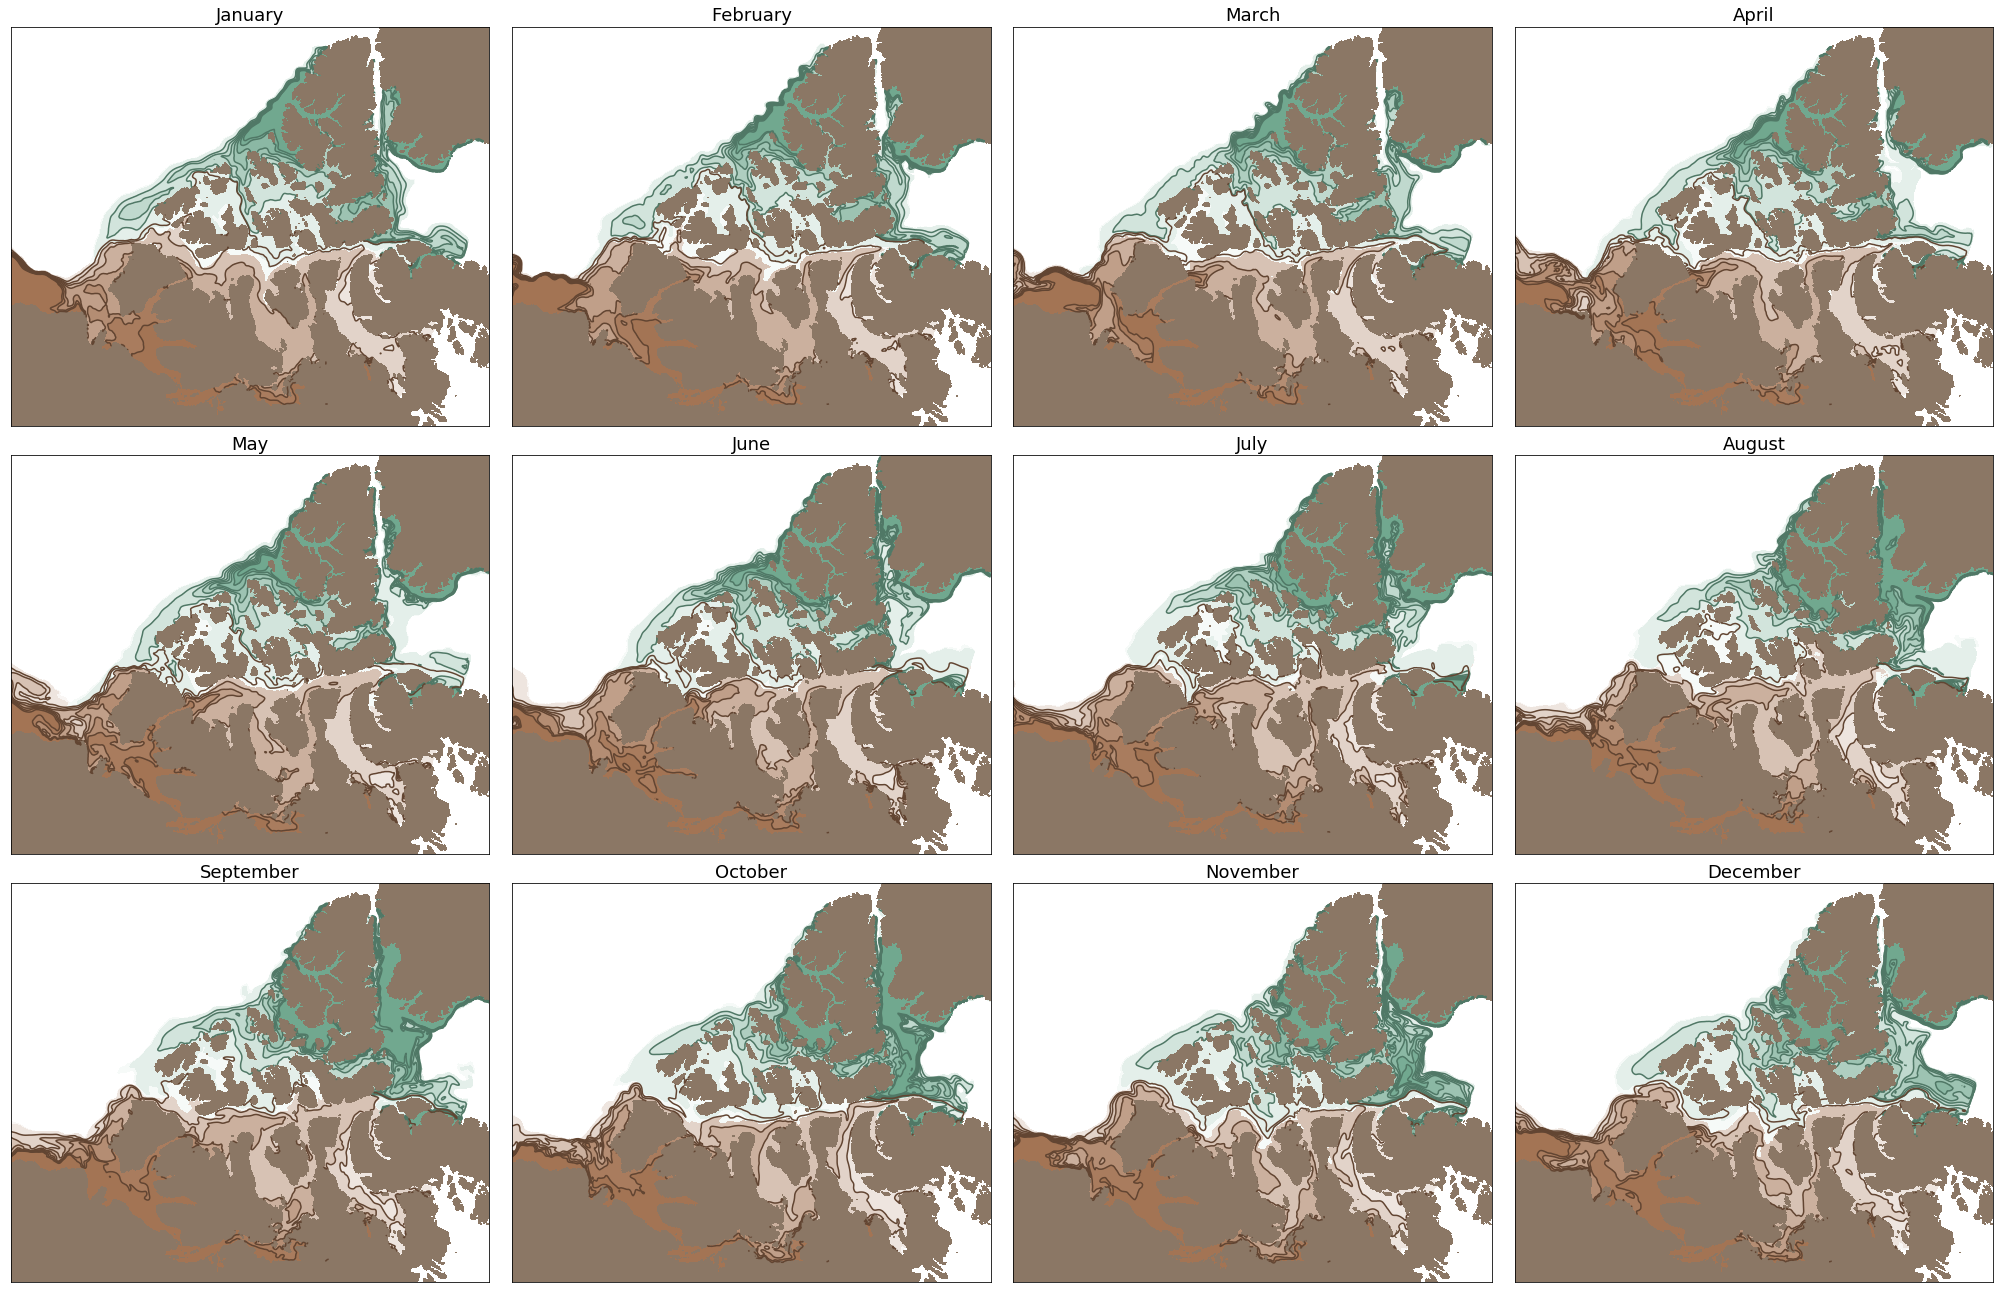

In [36]:
fig, ax = plt.subplots(3,4, figsize=(28,18))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

for month in range(0,12):
    if month < 4:
        ax1 = ax[0,month]
    elif (month < 8) & (month > 3):
        ax1 = ax[1,month-4]
    else:
        ax1 = ax[2,month-8]
    
    proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -105, resolution='i', width=2.4e6, height=2.0e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)

    # Coloured contours:
    vmin_cont = 0; vmax_cont = 8; step_cont = 1;
    vmin_glac = 0; vmax_glac = 8; step_glac = 1;
    CS2 = proj2.contourf(x_model, y_model, ma_cont[month,:,:]*100, \
                         levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                         vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')
    CS1 = proj2.contourf(x_model, y_model, ma_glac[month,:,:]*100, \
                         levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                         vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

    # Contour lines:
    vmin_cglac=2; vmin_ccont = 2;
    contour_glac = 1; cvmax_glac = 8;
    contour_cont = 1; cvmax_cont = 8;
    glac = proj2.contour(x_model, y_model, ma_glac[month,:,:]*100, \
                         levels=np.arange(vmin_cglac, cvmax_glac+contour_glac, contour_glac), \
                         vmin=vmin_cglac, vmax=vmax_glac, colors='#507866')
    cont = proj2.contour(x_model, y_model, ma_cont[month,:,:]*100, \
                         levels=np.arange(vmin_ccont, cvmax_cont+contour_cont, contour_cont), \
                         vmin=vmin_ccont, vmax=vmax_cont, colors='#624532')

#     ax1.clabel(glac, [2], inline=1, fontsize=10, fmt='%1.f')
#     ax1.clabel(cont, [2, 4, 8], inline=1, fontsize=10, fmt='%1.f')
    
    ax1.set_title(months[month], fontsize=18)

    
plt.tight_layout() # pad=0.4, w_pad=0.5, h_pad=0.1
    
    
# # Colorbars:
# cbaxes1 = fig.add_axes([0.91, 0.23, 0.04, 0.34]) 
# cbaxes2 = fig.add_axes([0.99, 0.23, 0.04, 0.34])  
# CBar1   = plt.colorbar(CS1, ax=ax1, cax=cbaxes2, ticks=np.arange(0,16,2), drawedges=True) 
# CBar2   = plt.colorbar(CS2, ax=ax1, cax=cbaxes1, ticks=np.arange(0,16,2), drawedges=True) 
# CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
# CBar2.ax.tick_params(axis='y', length=0, labelsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R7-monthly-CAA.png', bbox_inches='tight', dpi=300)

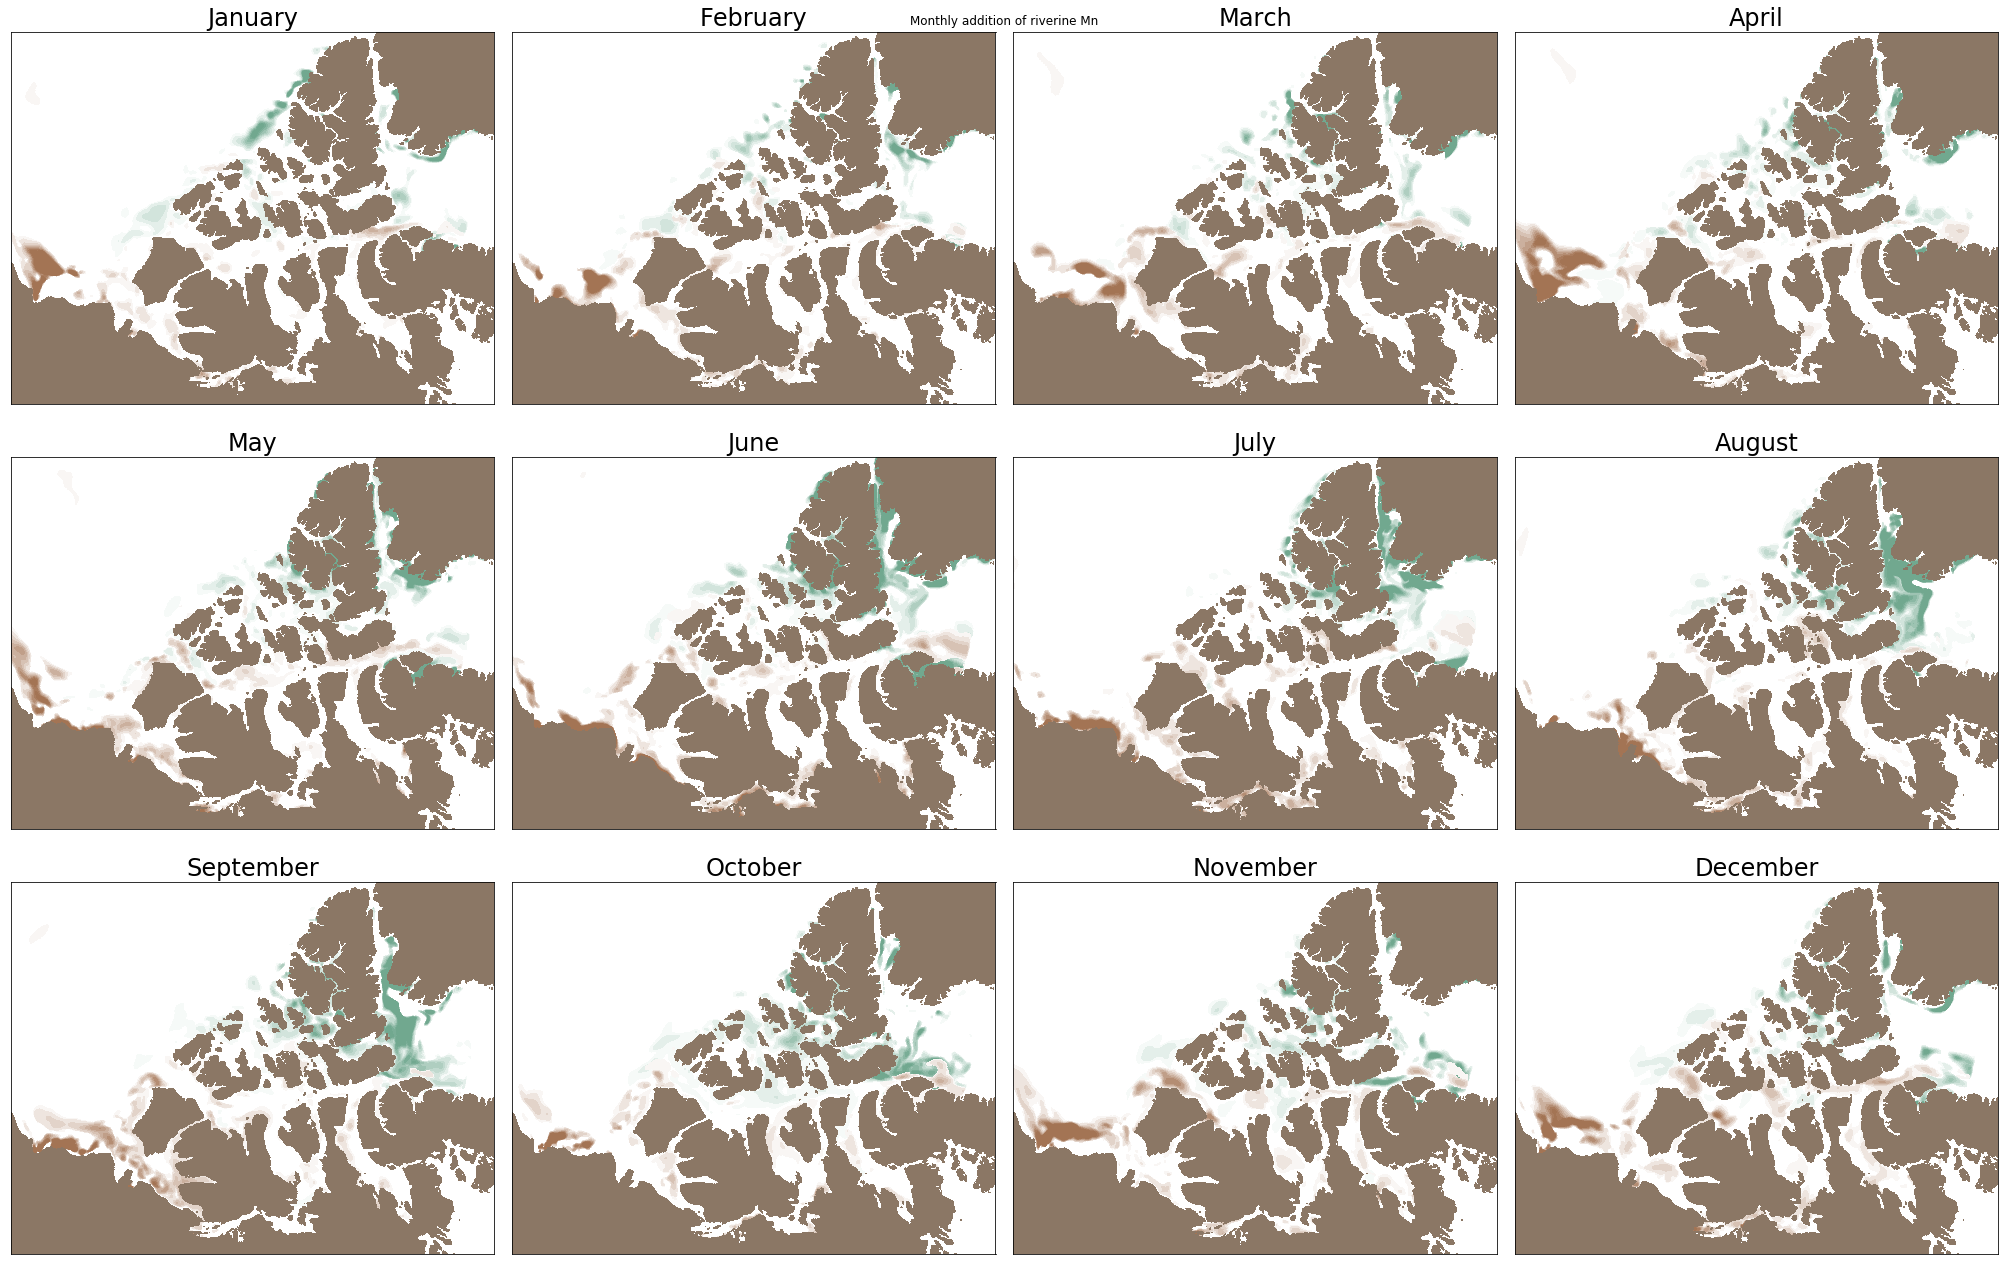

In [27]:
fig, ax = plt.subplots(3,4, figsize=(28,18))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

for month in range(0,12):
    if month < 4:
        ax1 = ax[0,month]
    elif (month < 8) & (month > 3):
        ax1 = ax[1,month-4]
    else:
        ax1 = ax[2,month-8]
    
    proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -107, resolution='i', width=2.6e6, height=2.0e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)

    vmin_glac = 0; vmax_glac = 4; step_glac = .5;
    vmin_cont = 0; vmax_cont = 4; step_cont = .5;

    CS1 = proj2.contourf(x_model, y_model, diff_glacier[month], \
                         levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                         vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')
    CS2 = proj2.contourf(x_model, y_model, diff_continental[month], \
                         levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                         vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')

    
    ax1.set_title(months[month], fontsize=24)

    
fig.suptitle('Monthly addition of riverine Mn')
    
plt.tight_layout() # pad=0.4, w_pad=0.5, h_pad=0.1

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R7-monthly-CAA.png', bbox_inches='tight', dpi=300)

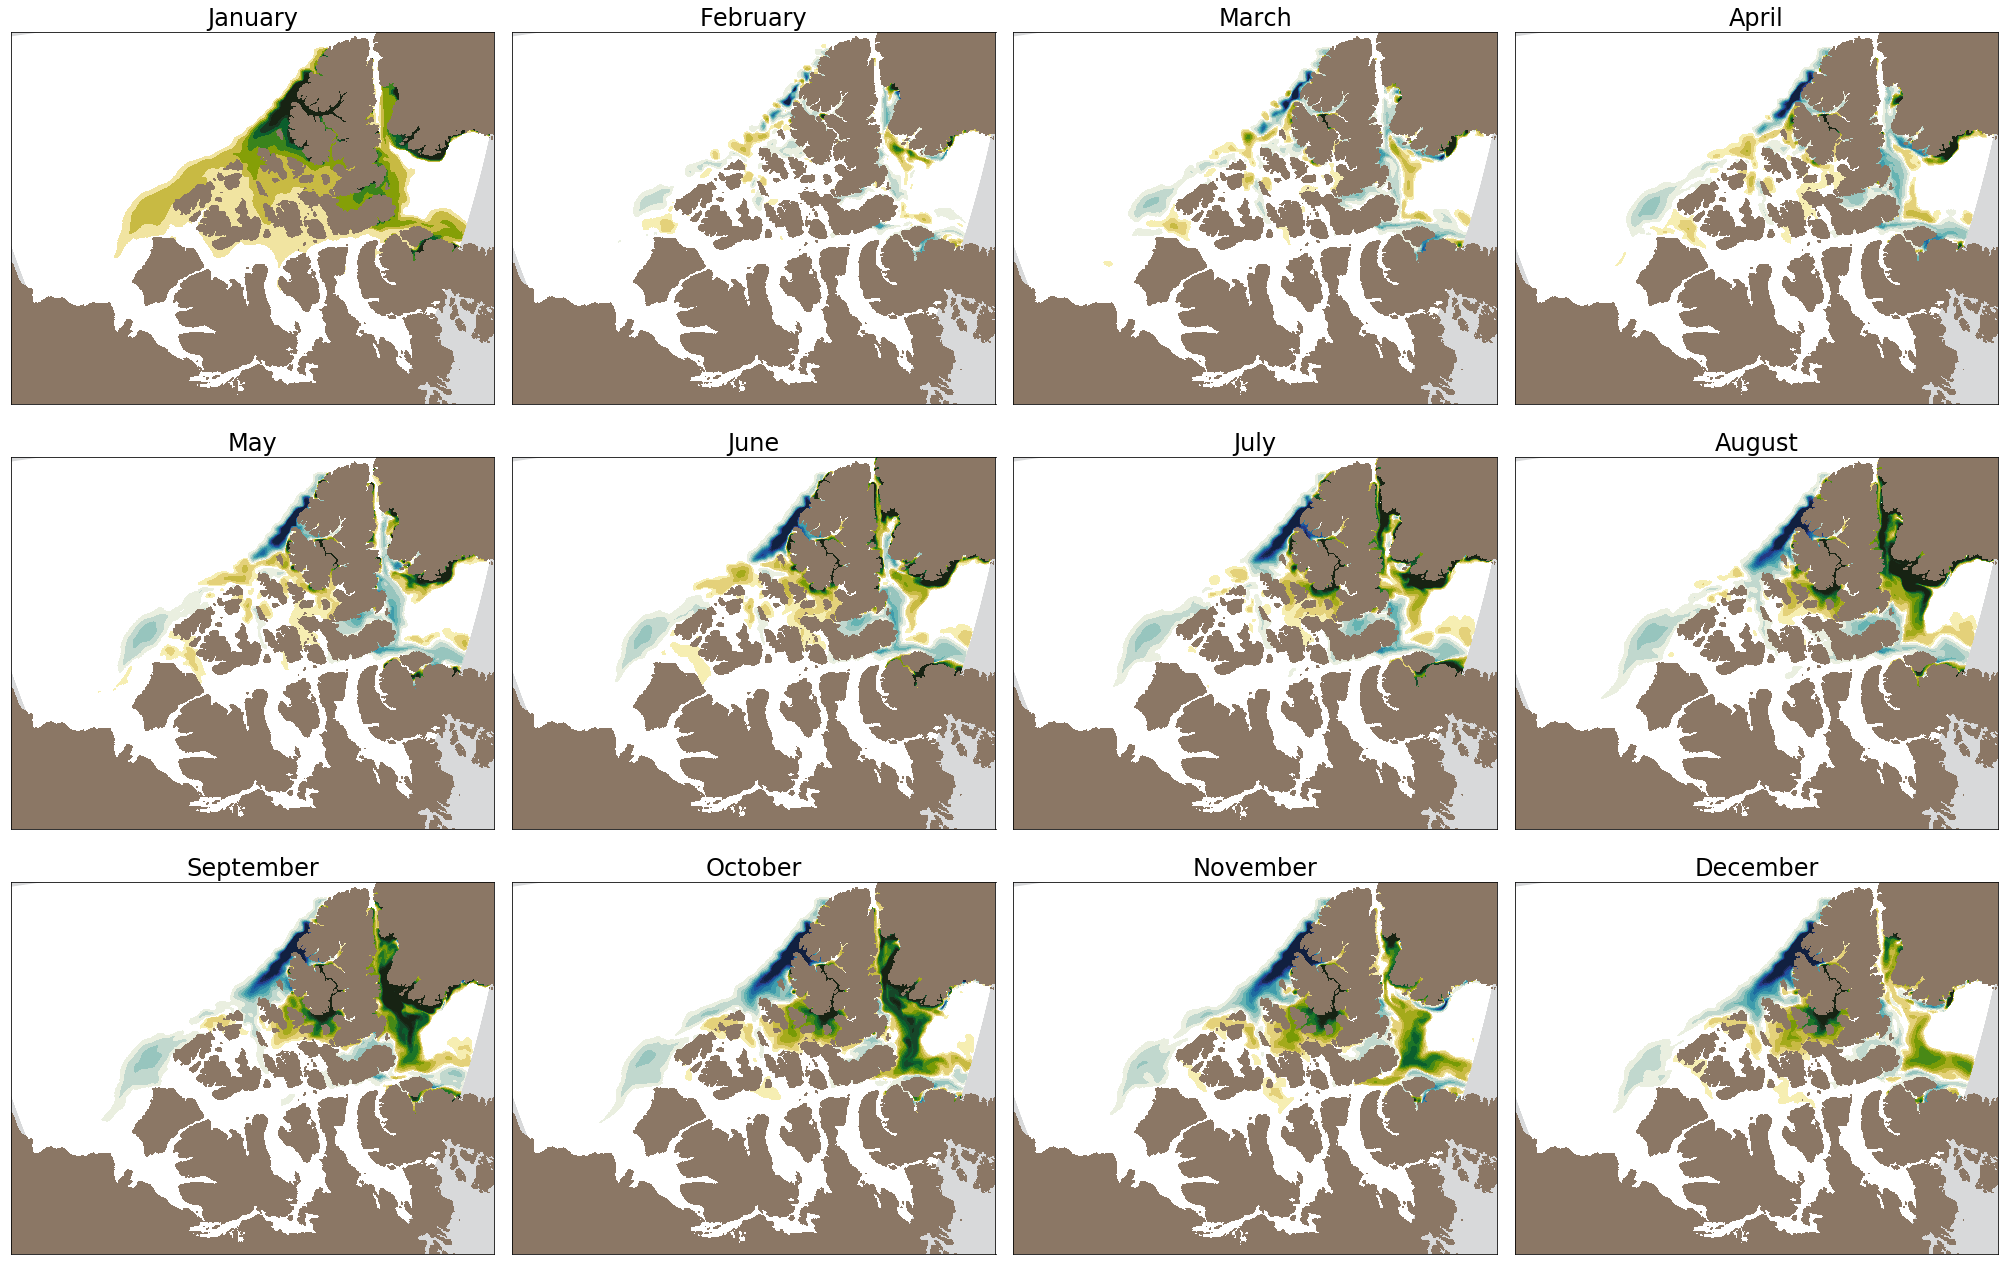

In [44]:
fig, ax = plt.subplots(3,4, figsize=(28,18))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

for month in range(0,12):
    if month < 4:
        ax1 = ax[0,month]
    elif (month < 8) & (month > 3):
        ax1 = ax[1,month-4]
    else:
        ax1 = ax[2,month-8]
    
    proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -107, resolution='i', width=2.6e6, height=2.0e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)

    
    if month==reference_month:
        # Coloured glacours:
        vmin_glac = -12; vmax_glac = 12; step_glac = 2;
        CS1 = proj2.contourf(x_model, y_model, ma_glac[month+1,:,:]*100, \
                             levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                             vmin=vmin_glac, vmax=vmax_glac, cmap=cmocean.cm.delta, extend='both')
    else:
        vmin_glac = -10; vmax_glac = 10; step_glac = 1;
        CS1 = proj2.contourf(x_model, y_model, diff_glacier[month], \
                             levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                             vmin=vmin_glac, vmax=vmax_glac, cmap=cmocean.cm.delta, extend='both')
        
    # Draw domain boundaries:
    proj2.plot(x_land[imax:-1,:] , y_land[imax:-1,:] , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[:,jmax:-1] , y_land[:,jmax:-1] , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[:,0:jmin]  , y_land[:,0:jmin]  , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[0:imin,:]  , y_land[0:imin,:]  , '-', color='#d8d9da', linewidth=10, zorder=1)
    
    ax1.set_title(months[month], fontsize=24)

# fig.suptitle('Difference in glacial contribution relative to January')
    
plt.tight_layout() # pad=0.4, w_pad=0.5, h_pad=0.1

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R7-monthly-CAA.png', bbox_inches='tight', dpi=300)

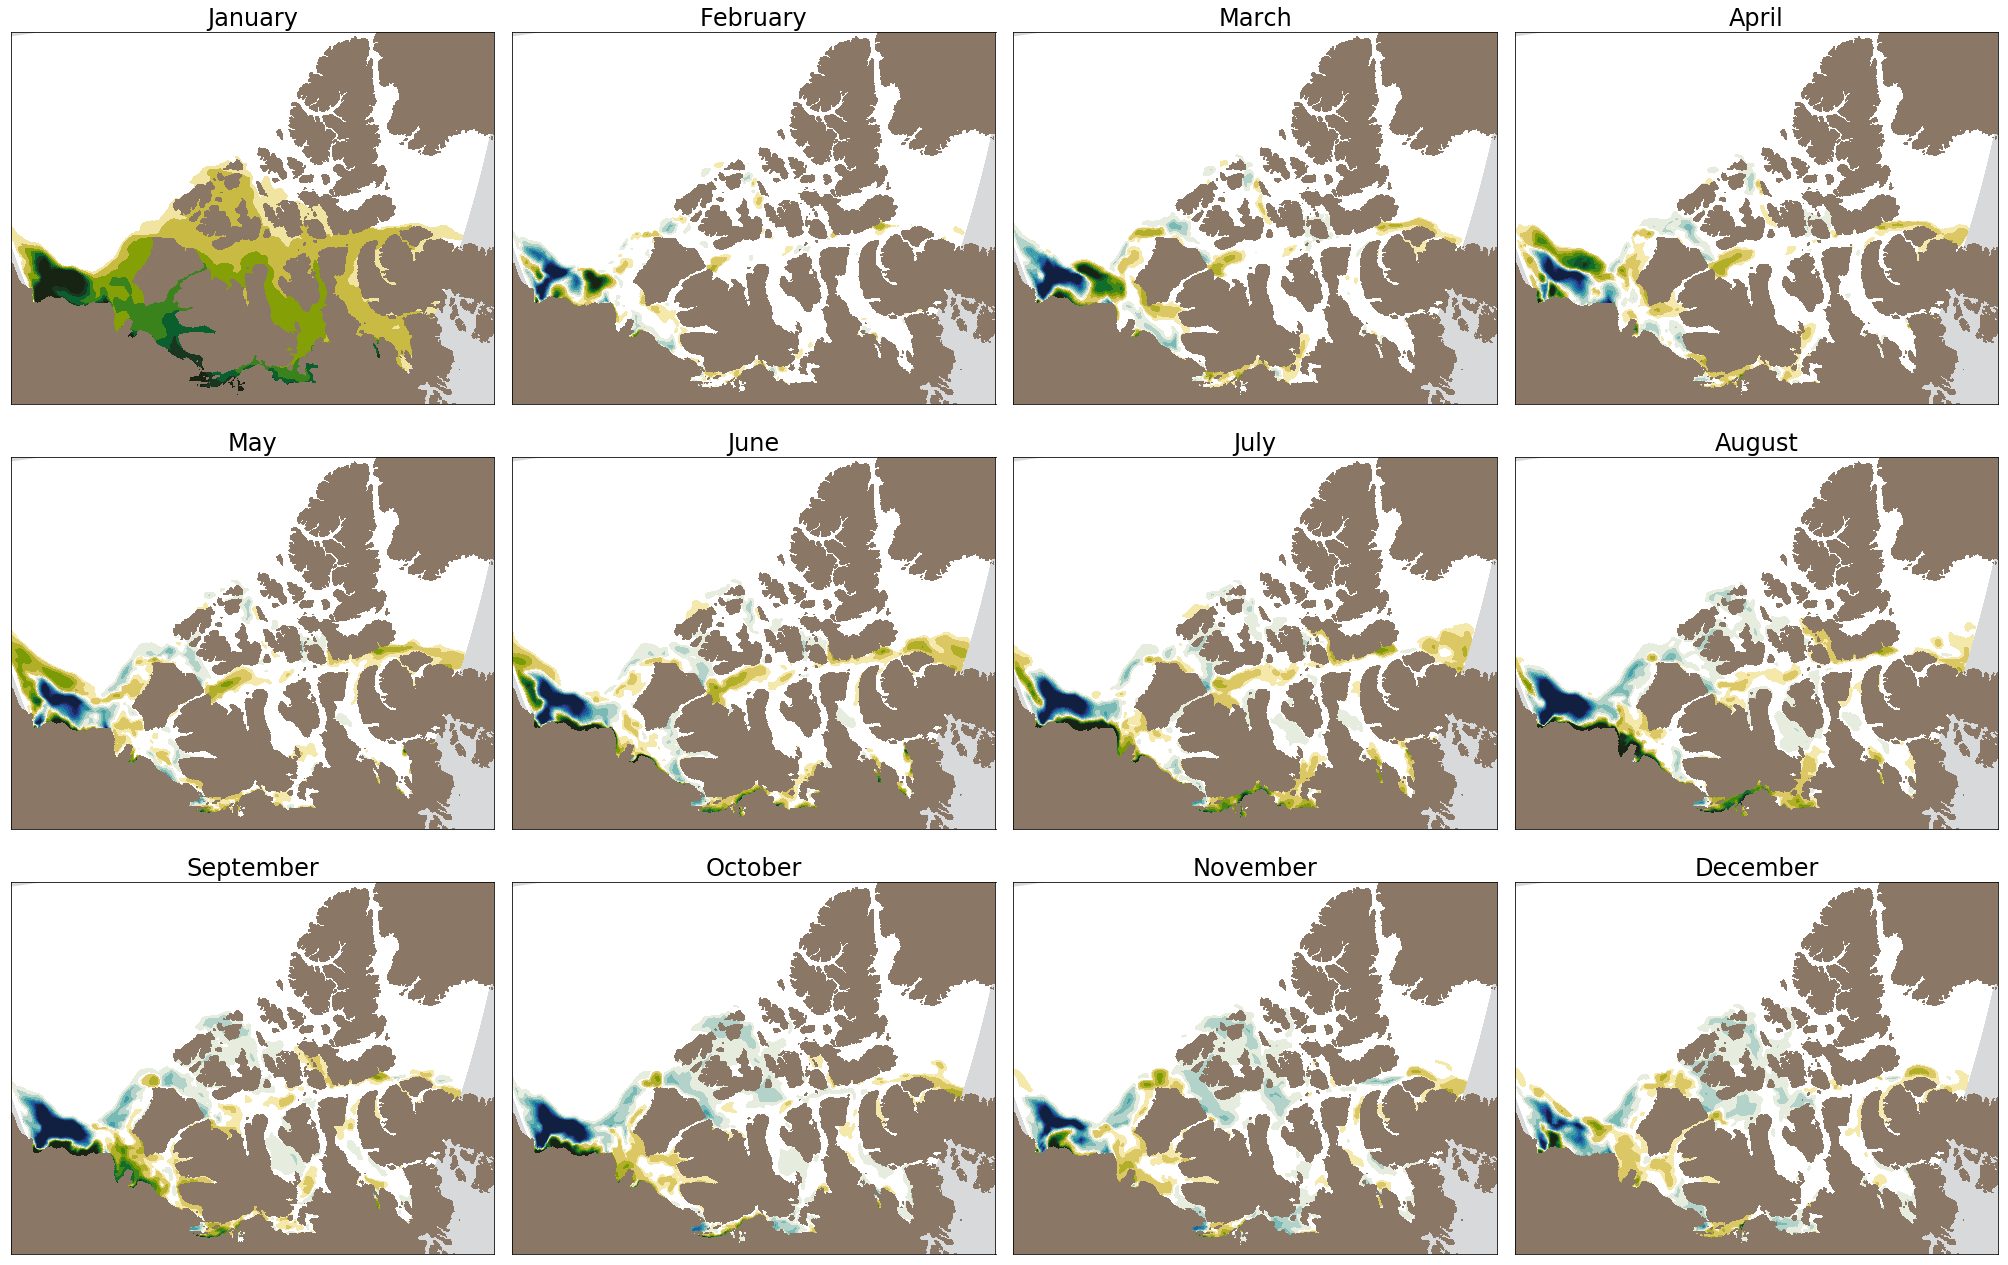

In [46]:
fig, ax = plt.subplots(3,4, figsize=(28,18))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

for month in range(0,12):
    if month < 4:
        ax1 = ax[0,month]
    elif (month < 8) & (month > 3):
        ax1 = ax[1,month-4]
    else:
        ax1 = ax[2,month-8]
    
    proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -107, resolution='i', width=2.6e6, height=2.0e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)
    
    if month==reference_month:
        # Coloured contours:
        vmin_cont = -12; vmax_cont = 12; step_cont = 2;
        CS1 = proj2.contourf(x_model, y_model, ma_cont[month+1,:,:]*100, \
                             levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                             vmin=vmin_cont, vmax=vmax_cont, cmap=cmocean.cm.delta, extend='both')
    else:
        vmin_cont = -8; vmax_cont = 8; step_cont = 1;

        CS1 = proj2.contourf(x_model, y_model, diff_continental[month], \
                             levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                             vmin=vmin_cont, vmax=vmax_cont, cmap=cmocean.cm.delta, extend='both')

    # Draw domain boundaries:
    proj2.plot(x_land[imax:-1,:] , y_land[imax:-1,:] , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[:,jmax:-1] , y_land[:,jmax:-1] , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[:,0:jmin]  , y_land[:,0:jmin]  , '-', color='#d8d9da', linewidth=10, zorder=1)
    proj2.plot(x_land[0:imin,:]  , y_land[0:imin,:]  , '-', color='#d8d9da', linewidth=10, zorder=1)
    
    ax1.set_title(months[month], fontsize=24)

# fig.suptitle('Difference in continental contribution relative to January')
    
plt.tight_layout() # pad=0.4, w_pad=0.5, h_pad=0.1

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R7-monthly-CAA.png', bbox_inches='tight', dpi=300)

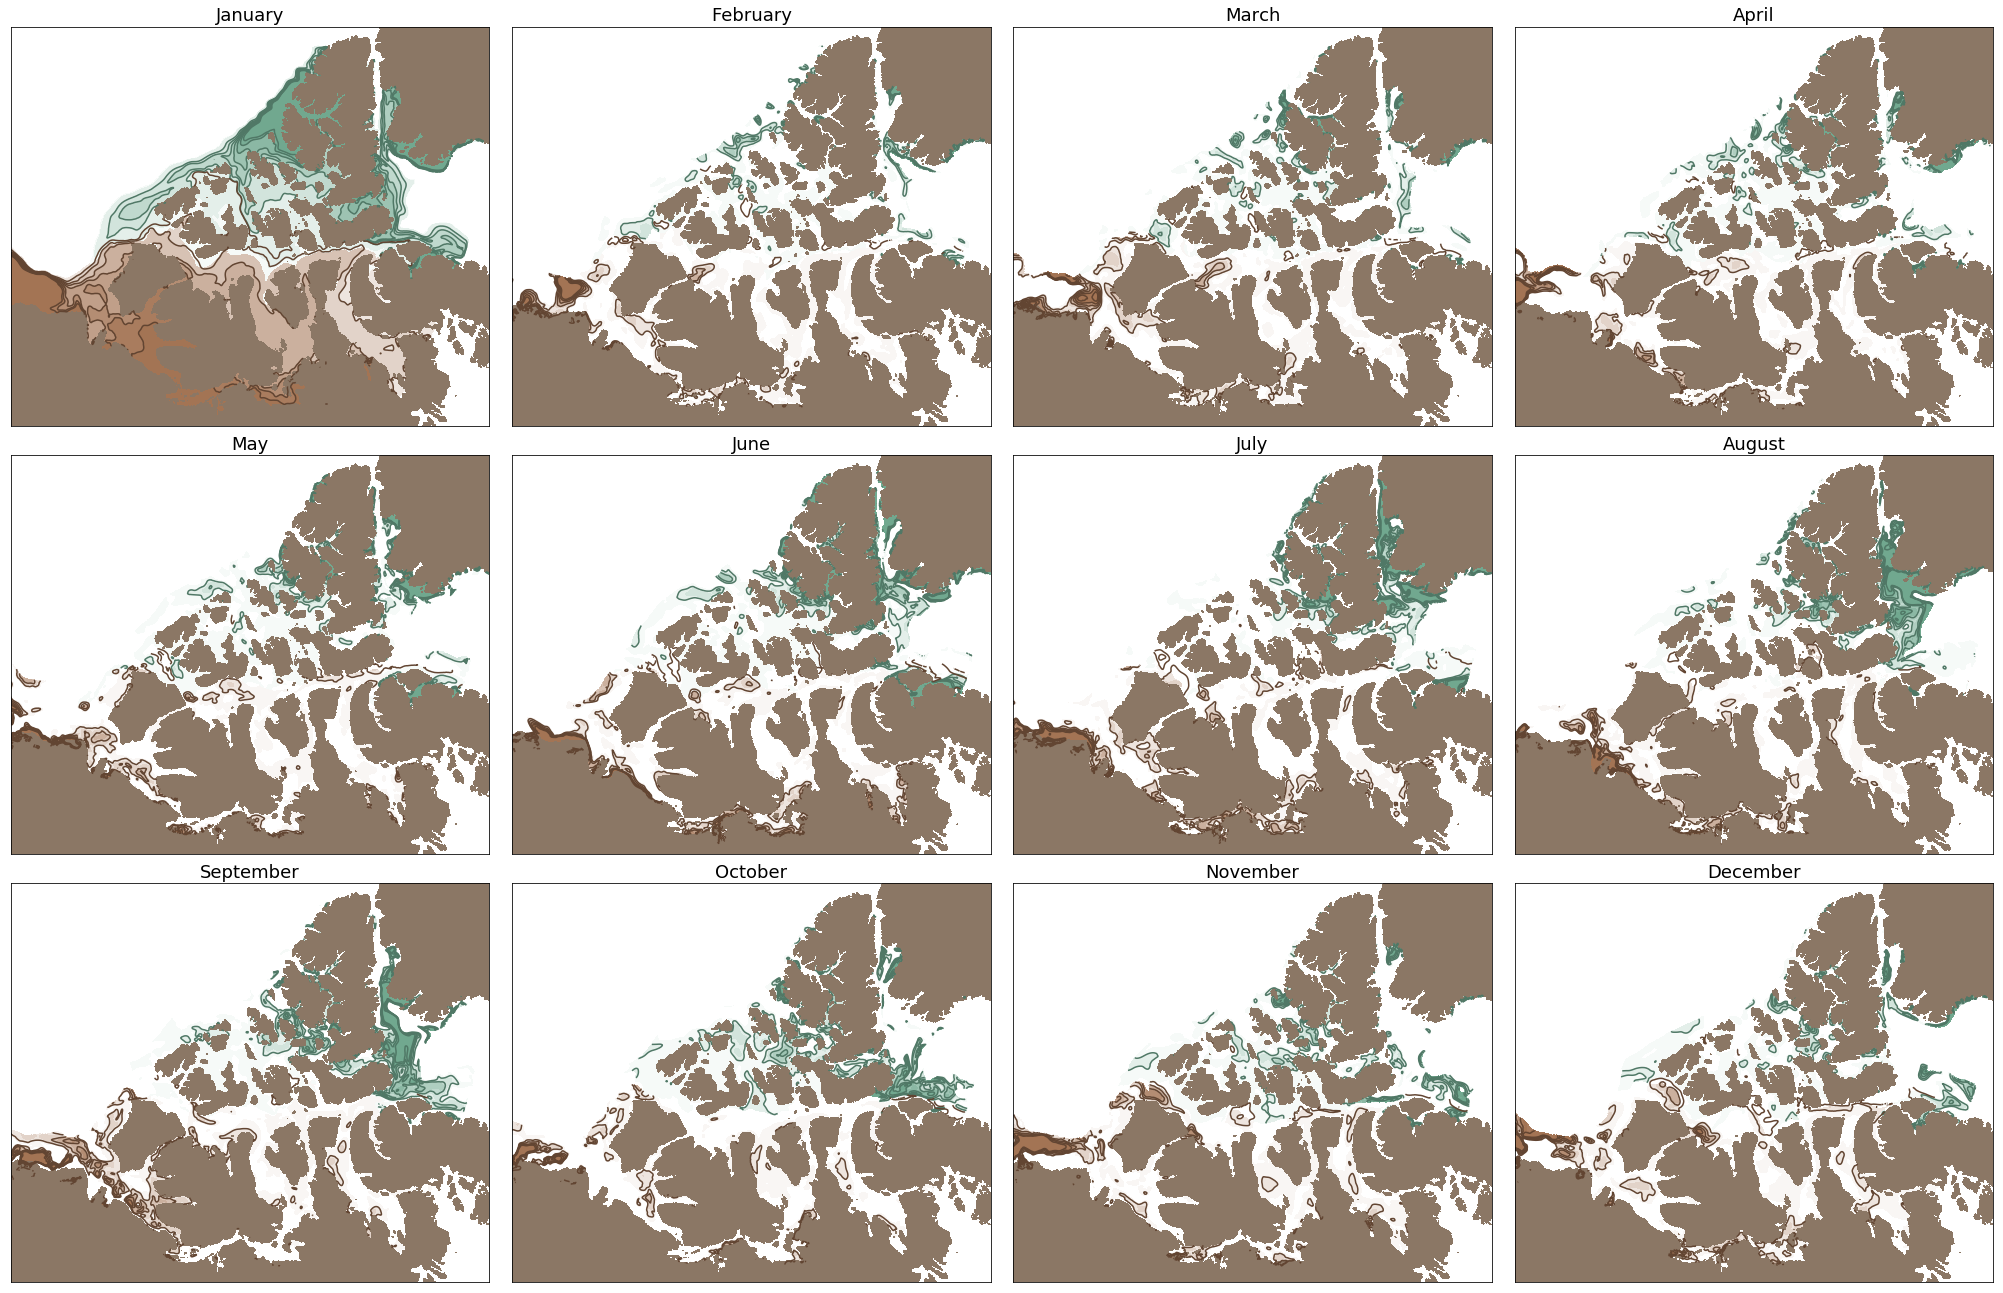

In [37]:
fig, ax = plt.subplots(3,4, figsize=(28,18))

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', \
         'August', 'September', 'October', 'November', 'December']

for month in range(0,12):
    if month < 4:
        ax1 = ax[0,month]
    elif (month < 8) & (month > 3):
        ax1 = ax[1,month-4]
    else:
        ax1 = ax[2,month-8]
    
    proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -105, resolution='i', width=2.4e6, height=2.0e6, ax=ax1)

    x_land, y_land = proj2(lon, lat)
    proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

    #---------------------
    x_model, y_model = proj2(lons, lats)

    
    if month==0:
        # Coloured contours:
        vmin_cont = 0; vmax_cont = 8; step_cont = 1;
        vmin_glac = 0; vmax_glac = 8; step_glac = 1;
        CS2 = proj2.contourf(x_model, y_model, ma_cont[month,:,:]*100, \
                             levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                             vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')
        CS1 = proj2.contourf(x_model, y_model, ma_glac[month,:,:]*100, \
                             levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                             vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

        # Contour lines:
        vmin_cglac=2; vmin_ccont = 2;
        contour_glac = 1; cvmax_glac = 8;
        contour_cont = 1; cvmax_cont = 8;
        glac = proj2.contour(x_model, y_model, ma_glac[month,:,:]*100, \
                             levels=np.arange(vmin_cglac, cvmax_glac+contour_glac, contour_glac), \
                             vmin=vmin_cglac, vmax=vmax_glac, colors='#507866')
        cont = proj2.contour(x_model, y_model, ma_cont[month,:,:]*100, \
                             levels=np.arange(vmin_ccont, cvmax_cont+contour_cont, contour_cont), \
                             vmin=vmin_ccont, vmax=vmax_cont, colors='#624532')
    else:
        vmin_cont = 0; vmax_cont = 4; step_cont = .5;
        vmin_glac = 0; vmax_glac = 4; step_glac = .5;
        
        refc = ma_cont[month-1,:,:]
        refg = ma_glac[month-1,:,:]

        CS2 = proj2.contourf(x_model, y_model, (ma_cont[month,:,:]-refc)*100, \
                             levels=np.arange(vmin_cont, vmax_cont+step_cont, step_cont), \
                             vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')
        CS1 = proj2.contourf(x_model, y_model, (ma_glac[month,:,:]-refg)*100, \
                             levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                             vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

        # Contour lines:
        vmin_cglac=0.5; vmin_ccont = 0.5;
        contour_glac = 1; cvmax_glac = 4;
        contour_cont = 1; cvmax_cont = 4;
        glac = proj2.contour(x_model, y_model, (ma_glac[month,:,:]-refg)*100, \
                             levels=np.arange(vmin_cglac, cvmax_glac+contour_glac, contour_glac), \
                             vmin=vmin_cglac, vmax=vmax_glac, colors='#507866')
        cont = proj2.contour(x_model, y_model, (ma_cont[month,:,:]-refc)*100, \
                             levels=np.arange(vmin_ccont, cvmax_cont+contour_cont, contour_cont), \
                             vmin=vmin_ccont, vmax=vmax_cont, colors='#624532')

        #     ax1.clabel(glac, [2], inline=1, fontsize=10, fmt='%1.f')
        #     ax1.clabel(cont, [2, 4, 8], inline=1, fontsize=10, fmt='%1.f')
    
    ax1.set_title(months[month], fontsize=18)

    
plt.tight_layout() # pad=0.4, w_pad=0.5, h_pad=0.1
    
    
# # Colorbars:
# cbaxes1 = fig.add_axes([0.91, 0.23, 0.04, 0.34]) 
# cbaxes2 = fig.add_axes([0.99, 0.23, 0.04, 0.34])  
# CBar1   = plt.colorbar(CS1, ax=ax1, cax=cbaxes2, ticks=np.arange(0,16,2), drawedges=True) 
# CBar2   = plt.colorbar(CS2, ax=ax1, cax=cbaxes1, ticks=np.arange(0,16,2), drawedges=True) 
# CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
# CBar2.ax.tick_params(axis='y', length=0, labelsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R7-monthly-CAA.png', bbox_inches='tight', dpi=300)

Cross sections:

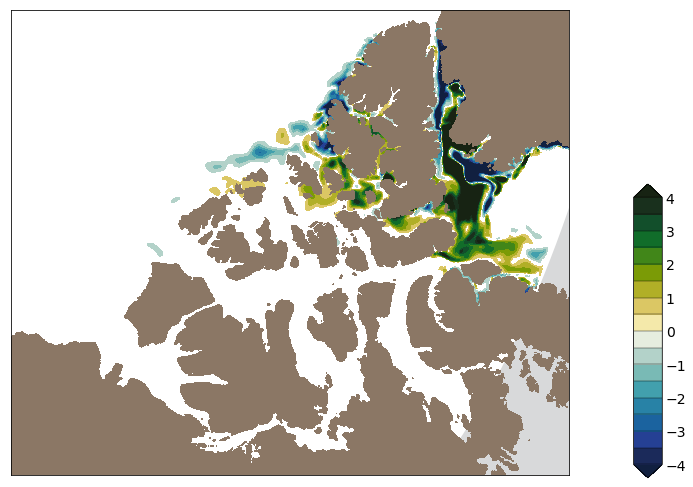

In [34]:
month=8

fig, ax1 = plt.subplots(figsize=(10,12))

proj2 = Basemap(projection='stere',lat_0 = 76, lon_0 = -105, resolution='i', width=2.4e6, height=2.0e6, ax=ax1)

x_land, y_land = proj2(lon, lat)
proj2.contourf(x_land[:,:], y_land[:,:], land_mask[10,:,:], \
               cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)

#---------------------
x_model, y_model = proj2(lons, lats)

# Coloured contours:
vmin_glac = -4; vmax_glac = 4; step_glac = .5;
CS1 = proj2.contourf(x_model, y_model, diff_glacier[month], \
                     levels=np.arange(vmin_glac, vmax_glac+step_glac, step_glac), \
                     vmin=vmin_glac, vmax=vmax_glac, cmap=cmocean.cm.delta, extend='both')

# # Contour lines:
# vmin_cglac=-4;
# contour_glac = 2; cvmax_glac = 4;
# glac = proj2.contour(x_model, y_model, diff_glacier[month], \
#                      levels=np.arange(vmin_cglac, cvmax_glac+contour_glac, contour_glac), \
#                      vmin=vmin_cglac, vmax=vmax_glac, colors='w')


# Draw domain boundaries:
proj2.plot(x_land[imin-60,jmin:jmax] , y_land[imin-60,jmin:jmax] , \
           '-', color='#d8d9da', linewidth=120, zorder=1)
proj2.plot(x_land[imin:imax,jmax+10] , y_land[imin:imax,jmax+10] , \
           '-', color='#d8d9da', linewidth=40, zorder=1)

# Colorbars:
cbaxes2 = fig.add_axes([0.99, 0.23, 0.04, 0.34])  
CBar1   = plt.colorbar(CS1, ax=ax1, cax=cbaxes2, ticks=np.arange(-16,16,1), drawedges=True) 
CBar1.ax.tick_params(axis='y', length=0, labelsize=14)

# fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R2-CAA.png', bbox_inches='tight', dpi=300)

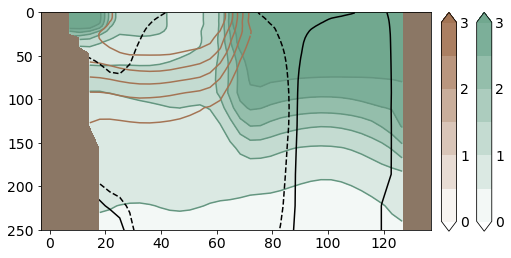

In [41]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

ax.invert_yaxis()
ax.set_ylim([250, 0])

ax.contourf([73.6, 74.6], [0, 400], np.ones((2,2)), cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)            

# Coloured contours:
vmin_cont = 0; vmax_cont = 3; step_cont = .5;
vmin_glac = 0; vmax_glac = 3; step_glac = .5;

# Coloured in contours for river Mn:
CS1 = ax.contourf(distance_PC, depth, np.transpose(ma_cont_xs[8,:,P1i,P1j])*100, \
                  levels=np.arange(vmin_cont,vmax_cont+step_cont,step_cont), \
                  vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')
CS2 = ax.contourf(distance_PC, depth, np.transpose(ma_glac_xs[8,:,P1i,P1j])*100, \
                  levels=np.arange(vmin_glac,vmax_glac+step_glac,step_glac), \
                  vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

# Contour lines for river Mn:
ax.contour(distance_PC, depth, np.transpose(ma_glac_xs[8,:,P1i,P1j])*100, \
           levels=np.arange(vmin_glac,vmax_glac+step_glac,step_glac), \
           vmin=vmin_glac, vmax=vmax_glac, colors='#649680')
ax.contour(distance_PC, depth, np.transpose(ma_cont_xs[8,:,P1i,P1j])*100, \
           levels=np.arange(vmin_cont,vmax_cont+0.5,0.5), \
           vmin=vmin_cont, vmax=vmax_cont, colors='#a47454')

# Volume flux:
ax.contour(distance_PC, depth, V11[8,:,10:-4], [-0.05, 0.05], colors='k')

cb1axes = fig.add_axes([0.92, 0.12, 0.03, 0.76]) 
cb2axes = fig.add_axes([0.99, 0.12, 0.03, 0.76]) 
CBar1 = fig.colorbar(CS1, cax=cb1axes, ticks=np.arange(0,6,1))
CBar2 = fig.colorbar(CS2, cax=cb2axes, ticks=np.arange(0,6,1))
CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
CBar2.ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.contourf(distance_PC+3.2, depth, land_mask[:,1479+P1i,159+P1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  
ax.contourf(distance_PC-3.3, depth, land_mask[:,1479+P1i,159+P1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  
ax.contourf(distance_PC, depth, land_mask[:,1479+P1i,159+P1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R2-XS-parry.png', bbox_inches='tight', dpi=300)

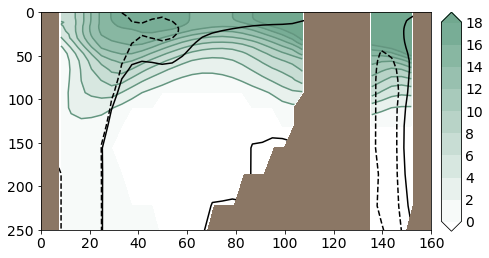

In [36]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

ax.invert_yaxis()
ax.set_ylim([250, 0])
ax.set_xlim([0, 160])

# Coloured contours:
vmin_cont = 0; vmax_cont = 18; step_cont = 2;
vmin_glac = 0; vmax_glac = 18; step_glac = 2;

# Coloured in contours:
CS1 = ax.contourf(distance_NS[::-1], depth, np.transpose(ma_glac_xs[8,:,N1i,N1j])*100, \
                  levels=np.arange(vmin_glac,vmax_glac+step_glac,step_glac), \
                  vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')

# Contour lines:
ax.contour(distance_NS[::-1], depth, np.transpose(ma_glac_xs[8,:,N1i,N1j])*100, \
           levels=np.arange(vmin_glac,vmax_glac+step_glac,step_glac), \
           vmin=vmin_glac, vmax=vmax_glac, colors='#649680', extend='both')

# Volume flux:
ax.contour(distance_NS[::-1], depth, V10[8,:,11:-7], [-0.05, 0.05], colors='k')

cb1axes = fig.add_axes([0.92, 0.12, 0.04, 0.76]) 
CBar1 = fig.colorbar(CS1, cax=cb1axes, ticks=np.arange(0,20,2))
CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)

ax.contourf(distance_NS[::-1]+3.2, depth, land_mask[:,1479+N1i,159+N1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  
ax.contourf(distance_NS[::-1]-3.3, depth, land_mask[:,1479+N1i,159+N1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  
ax.contourf(distance_NS[::-1], depth, land_mask[:,1479+N1i,159+N1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R2-XS-NS.png', bbox_inches='tight', dpi=300)

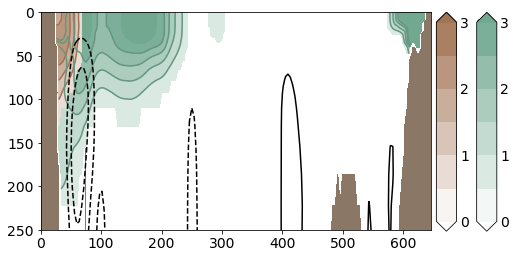

In [38]:
fig, ax = plt.subplots(1,1,figsize=(7,4))

ax.invert_yaxis()
ax.set_ylim([250, 0])
ax.contourf([73.6, 74.6], [0, 400], np.ones((2,2)), cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=1)            

# Coloured contours:
vmin_cont = 0; vmax_cont = 3; step_cont = 0.5;
vmin_glac = 0; vmax_glac = 3; step_glac = 0.5;

# Coloured in contours:
CS2 = ax.contourf(distance_BB, depth, np.transpose(ma_glac_xs[8,:,r1i,r1j])*100, \
                  levels=np.arange(vmin_glac,vmax_glac+step_glac,step_glac), \
                  vmin=vmin_glac, vmax=vmax_glac, cmap=glac_cmap, extend='both')
CS1 = ax.contourf(distance_BB, depth, np.transpose(ma_cont_xs[8,:,r1i,r1j])*100, \
                  levels=np.arange(vmin_cont,vmax_cont+step_cont,step_cont), \
                  vmin=vmin_cont, vmax=vmax_cont, cmap=cont_cmap, extend='both')

# Contour lines:
# step_glac = 0.5
# step_cont = 0.5
ax.contour(distance_BB, depth, np.transpose(ma_cont_xs[8,:,r1i,r1j])*100, \
           levels=np.arange(vmin_cont,vmax_cont+step_cont,step_cont), \
           vmin=vmin_cont, vmax=vmax_cont, colors='#a47454')
ax.contour(distance_BB, depth, np.transpose(ma_glac_xs[8,:,r1i,r1j])*100, \
           levels=np.arange(vmin_glac,vmax_glac,step_glac), \
           vmin=vmin_glac, vmax=vmax_glac, colors='#649680')

# Volume flux:
ax.contour(distance_BB[0:-1], depth, V08[8,:,:], [-1, -0.5, 0.5, 1], colors='k')
 
# Colour bars + figure features:
cb1axes = fig.add_axes([0.91, 0.12, 0.04, 0.76]) 
cb2axes = fig.add_axes([0.99, 0.12, 0.04, 0.76]) 
CBar1 = fig.colorbar(CS1, cax=cb1axes, ticks=np.arange(0,6,1))
CBar2 = fig.colorbar(CS2, cax=cb2axes, ticks=np.arange(0,6,1))
CBar1.ax.tick_params(axis='y', length=0, labelsize=14)
CBar2.ax.tick_params(axis='y', length=0, labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.contourf(distance_BB, depth, land_mask[:,1479+r1i,159+r1j], \
                   cmap=matplotlib.colors.ListedColormap(["#8b7765"]), zorder=2)  

fig.savefig('/ocean/brogalla/GEOTRACES/figures/rivers/R2-XS-BB.png', bbox_inches='tight', dpi=300)